# **Phishing URL detection: regression real dataset**

**RQ1:** What characteristics provide the greatest discriminatory information for identifying phishing sites compared to legitimate ones?  

**RQ2:** Do synthetic data generated by Large Language Models preserve the same statistical properties as real data?

**RQ3:** What are the main differences between synthetic data generated by LLMs and real data in regression and clustering contexts?

**RQ4:** Can the features generated by LLMs be mapped to known statistical distributions?

<br>

**Author:** Raffaele Aurucci

## **Reading filtered dataset**

In [1]:
download.file("https://drive.google.com/uc?id=1Hq5AkkiOBiPLmPMEzLbgPj83Hs_lzUnY&export=download", "Phishing_URL_Dataset_3_Filtered.csv")

In [2]:
df <- read.csv('Phishing_URL_Dataset_3_Filtered.csv', sep = ",")

In [3]:
str(df)

'data.frame':	20153 obs. of  21 variables:
 $ URLLength            : int  462 379 285 437 22 221 318 397 21 473 ...
 $ DomainLength         : int  14 14 14 14 14 11 11 13 13 13 ...
 $ TLDEncoding          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NoOfLettersInURL     : int  298 227 171 152 0 145 201 245 0 307 ...
 $ NoOfDegitsInURL      : int  87 81 54 264 11 29 58 88 10 100 ...
 $ NoOfSpecialCharsInURL: int  54 48 37 14 4 24 36 57 4 59 ...
 $ IsHTTPS              : int  1 1 1 0 0 1 1 0 0 1 ...
 $ LineOfCode           : int  2 2 11 242 17 11 2 2 11 125 ...
 $ LargestLineLength    : int  1638 1638 564 446 234 493 1638 1638 257 52977 ...
 $ HasTitle             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfReference        : int  0 0 1 1 2 1 0 0 1 7 ...
 $ DomainTitleMatchScore: num  0 0 0 0 0 0 0 0 0 0 ...
 $ URLTitleMatchScore   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ IsResponsive         : int  1 1

## **Correlation between features**

In [ ]:
if (!require(ggplot2))
    install.packages("ggplot2")

if (!require(corrplot))
    install.packages("corrplot")

library(ggplot2)
library(corrplot)

### Pearson's Correlation Matrix

In [ ]:
corr_pearson <- cor(df, method = "pearson")

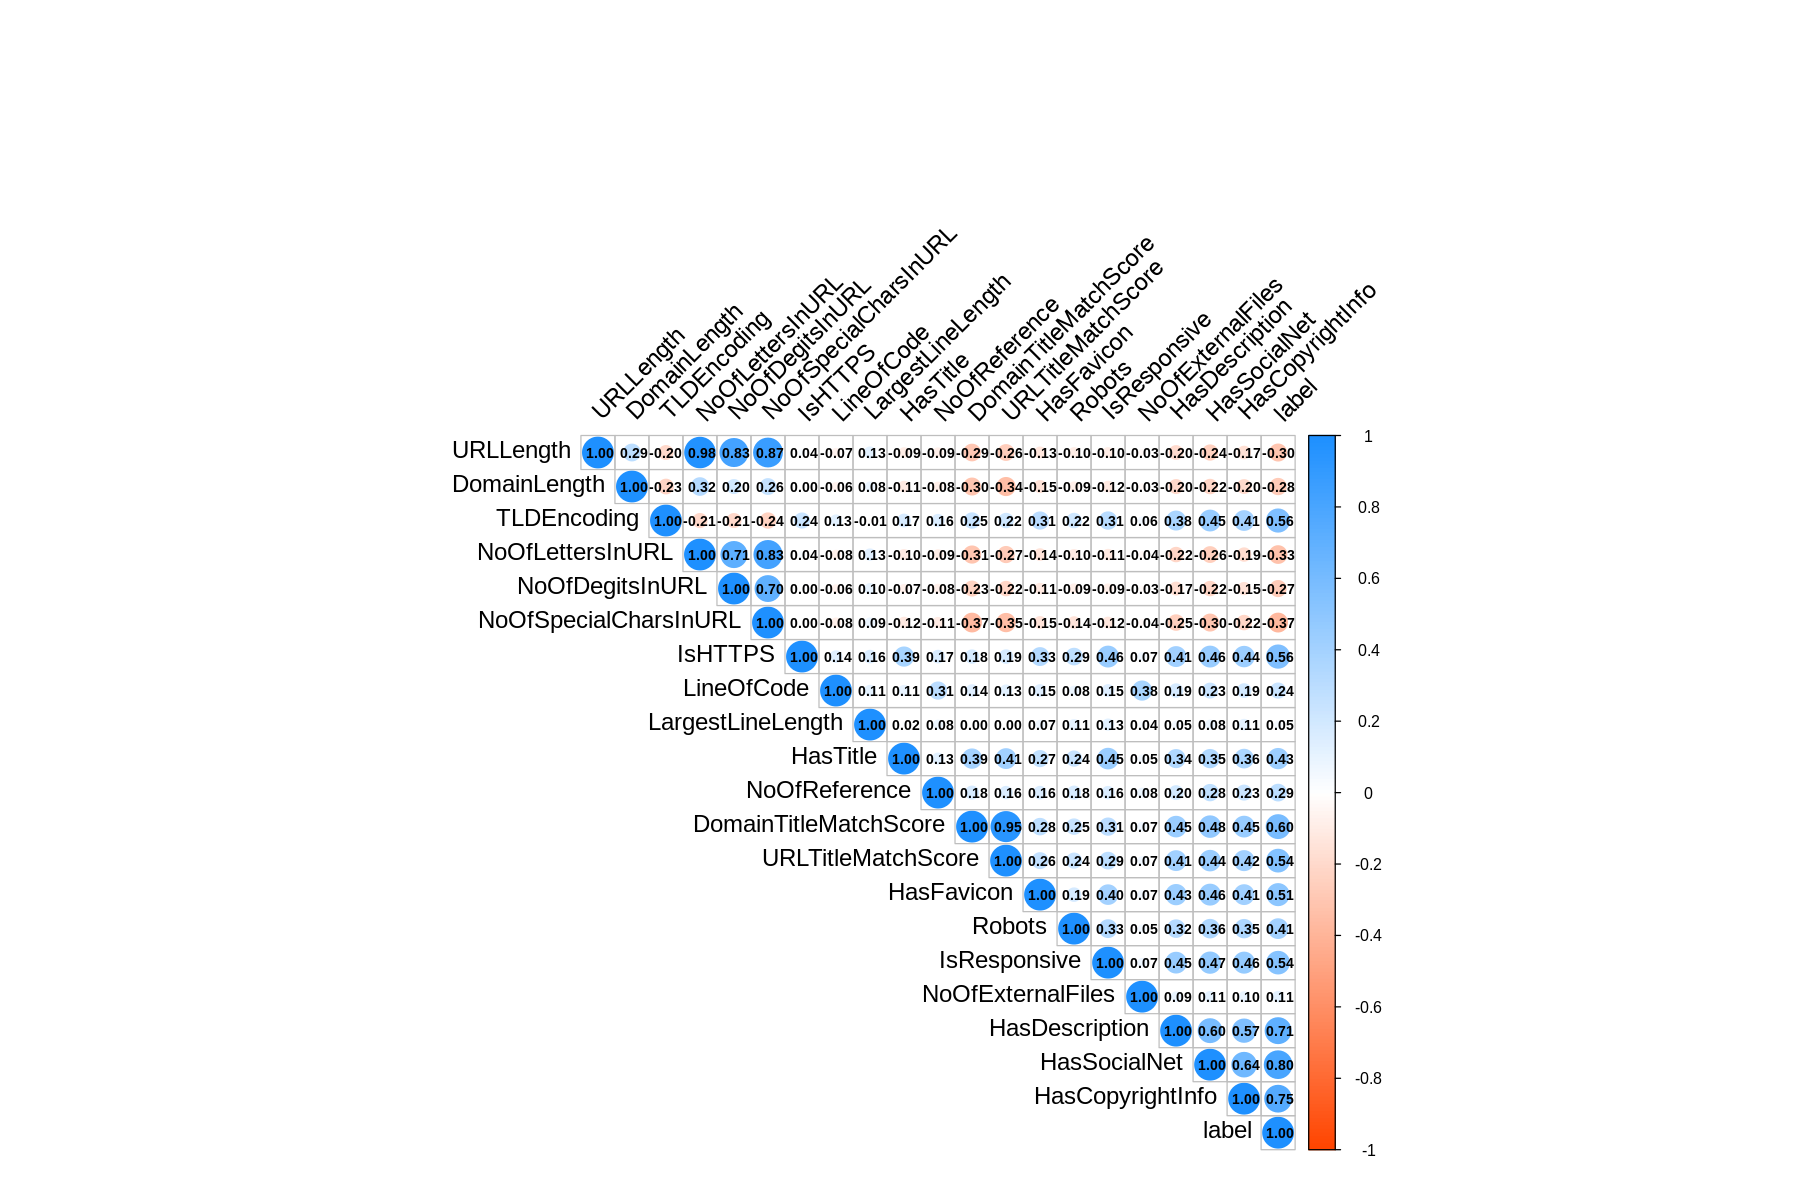

In [ ]:
# corrplot dimension
options(repr.plot.width = 15, repr.plot.height = 10)

corrplot(corr_pearson,
         method = "circle",
         type = "upper",
         col = colorRampPalette(c("orangered", "white", "dodgerblue"))(200),
         cex.main = 1.75,
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.7,
         cl.pos = "r",
         tl.cex = 1.2,
)

### Spearman's Correlation Matrix

In [ ]:
corr_spearman <- cor(df, method = "spearman")

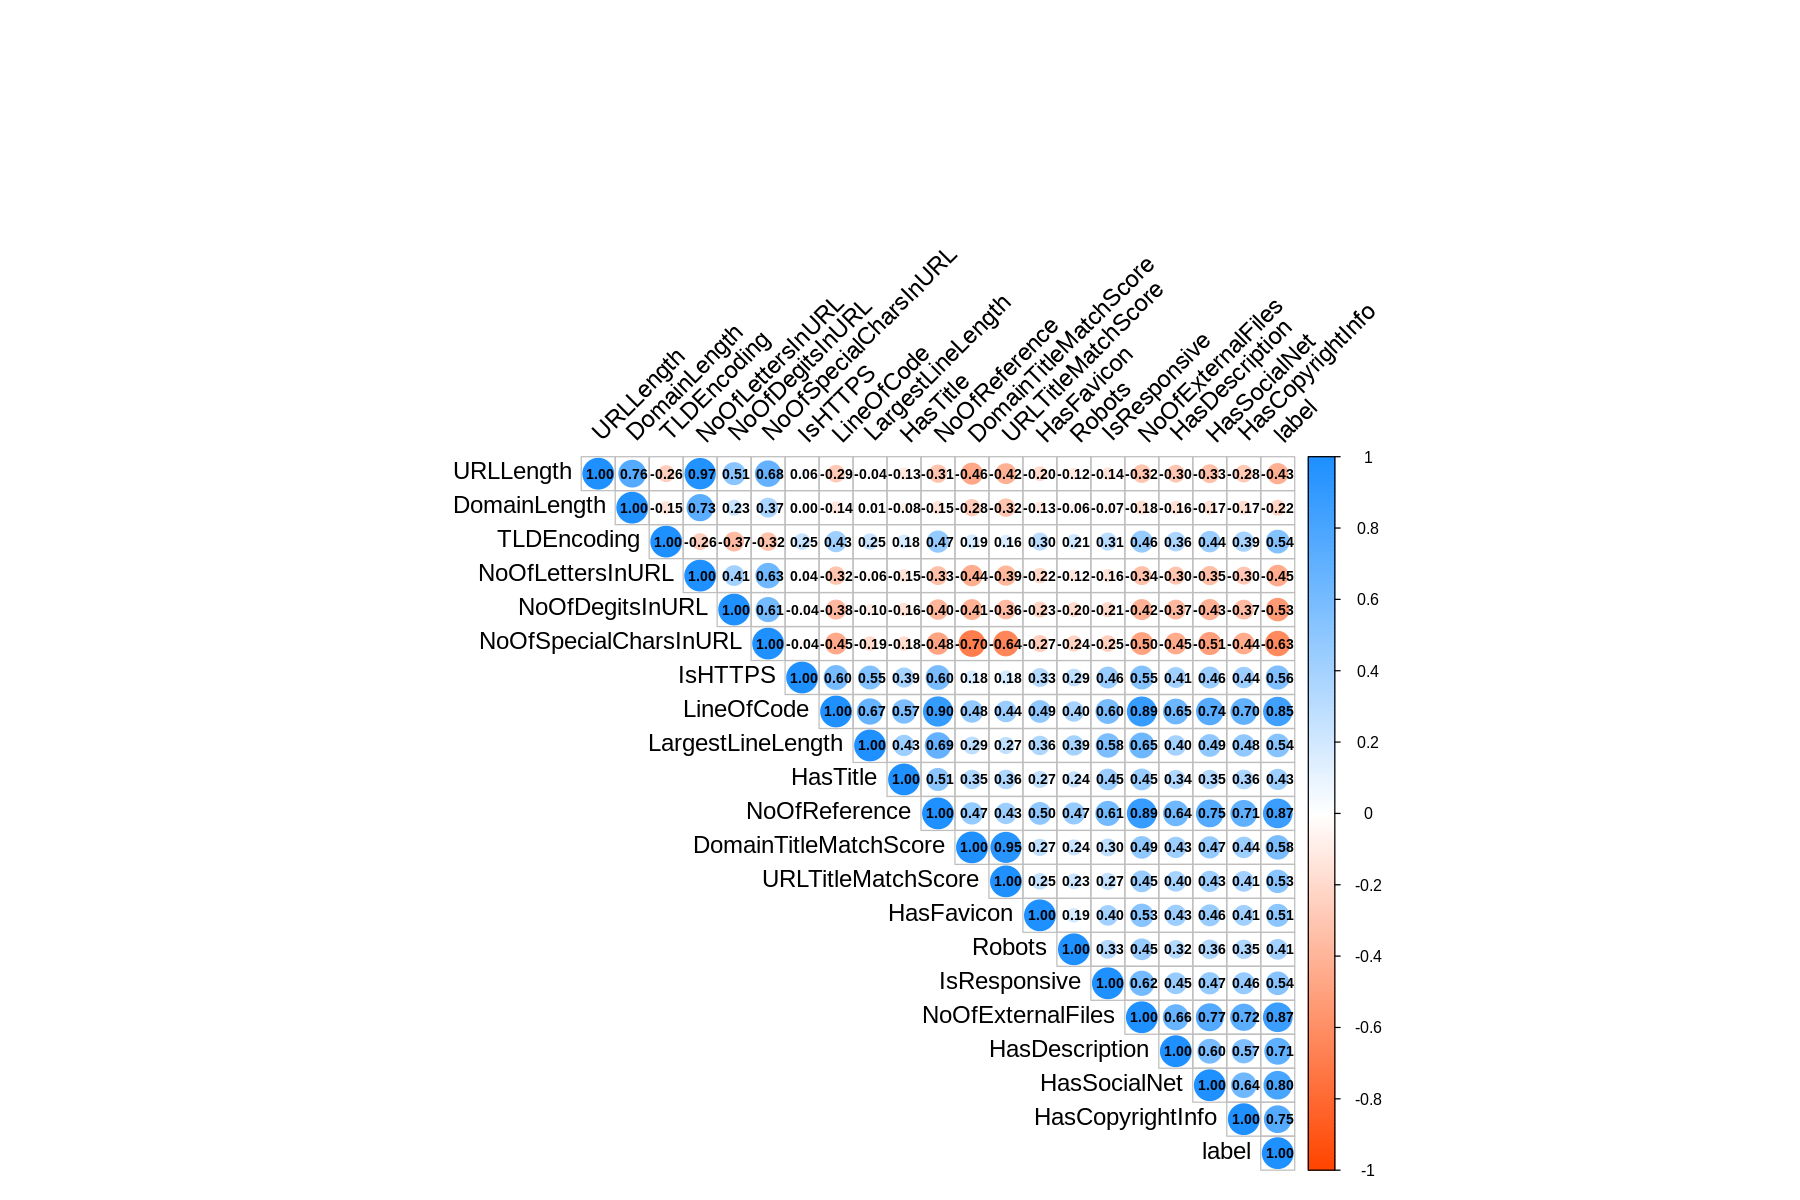

In [ ]:
# corrplot dimension
options(repr.plot.width = 15, repr.plot.height = 10)

corrplot(corr_spearman,
         method = "circle",
         type = "upper",
         col = colorRampPalette(c("orangered", "white", "dodgerblue"))(200),
         mar = c(0, 0, 1.75, 0),
         cex.main = 1.75,
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.7,
         cl.pos = "r",
         tl.cex = 1.2,
)

### **Z-score normalization**

The Z-score normalization (or standardization) is used to transform data so that each variable has a mean of 0 and a standard deviation of 1. This is important because it ensures that all variables are on the same scale and making the data comparable, especially when using algorithms that are sensitive to the scale, such as linear regression, K-nearest neighbors, etc.  


$$
Z = \frac{X - \mu}{\sigma}
$$

In [5]:
# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20, 21)

df_to_scale <- df[, -exclude_columns]

df_scaled <- scale(df_to_scale)

# Combined binary and continuous fratures
df_normalized <- cbind(df_scaled, df[, exclude_columns])

# Converting in data frame
df_normalized <- as.data.frame(df_normalized)

## **Simple Linear Regression**

### URLLength ~ NoOfDegitsInURL

In [ ]:
model <- lm(df_normalized$URLLength ~ df_normalized$NoOfDegitsInURL)

# r.square
summary(model)


Call:
lm(formula = df_normalized$URLLength ~ df_normalized$NoOfDegitsInURL)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0199  -0.1982  -0.0806   0.0958  16.9058 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.196e-15  3.958e-03       0        1    
df_normalized$NoOfDegitsInURL 8.272e-01  3.958e-03     209   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5619 on 20151 degrees of freedom
Multiple R-squared:  0.6843,	Adjusted R-squared:  0.6842 
F-statistic: 4.367e+04 on 1 and 20151 DF,  p-value: < 2.2e-16


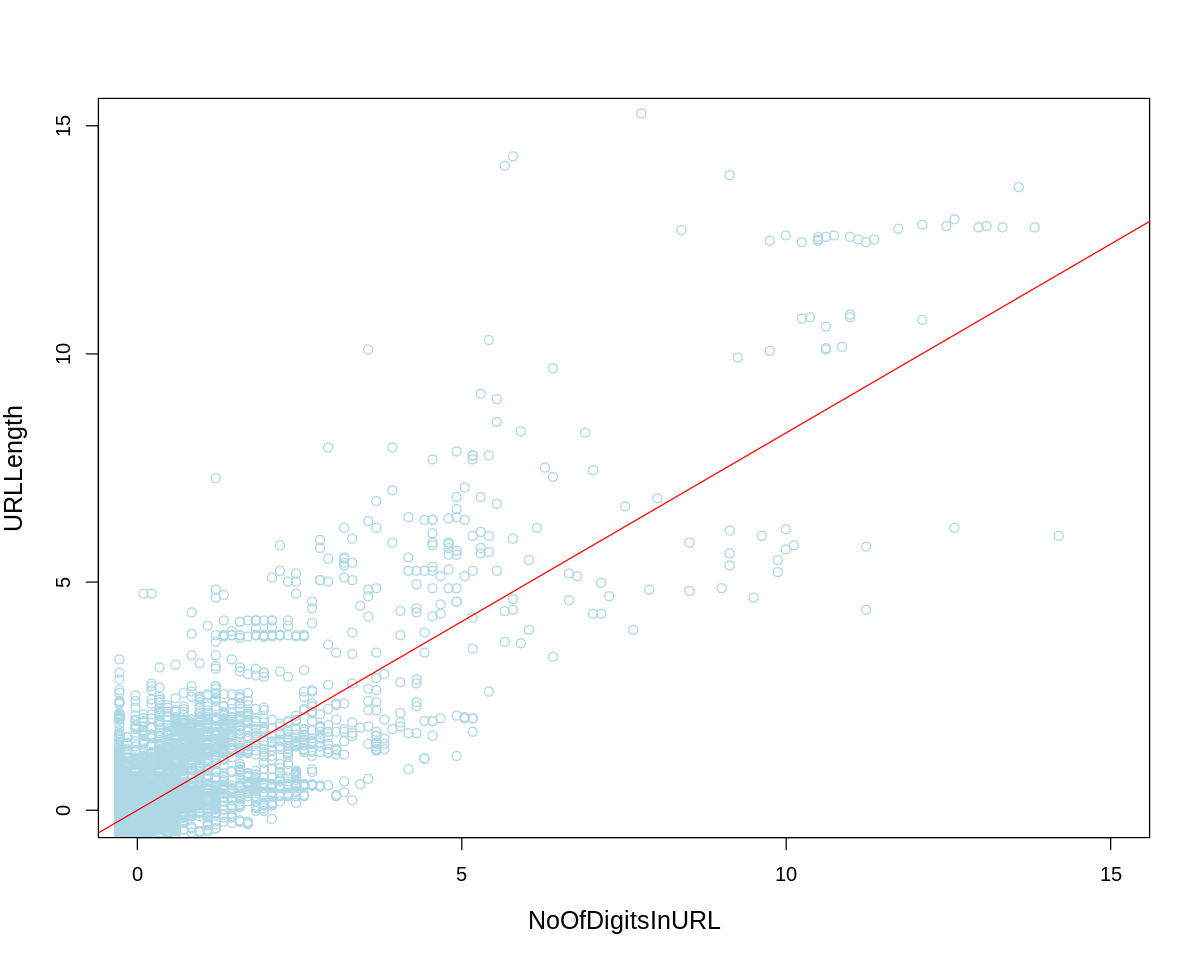

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$NoOfDegitsInURL, df_normalized$URLLength,
     xlab = "NoOfDigitsInURL", ylab = "URLLength",
     col = 'lightblue',
     xlim = c(0, 15), ylim = c(0, 15),
     cex.lab = 1.25)
abline(lm(df_normalized$URLLength ~ df_normalized$NoOfDegitsInURL), col = "red")

### URLTitleMatchScore ~ DomainTitleMatchScore

In [ ]:
model <- lm(df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore)

# r.square
summary(model)


Call:
lm(formula = df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33882 -0.09565 -0.09565  0.00065  1.91988 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.725e-15  2.215e-03     0.0        1    
df_normalized$DomainTitleMatchScore  9.493e-01  2.216e-03   428.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3145 on 20151 degrees of freedom
Multiple R-squared:  0.9011,	Adjusted R-squared:  0.9011 
F-statistic: 1.836e+05 on 1 and 20151 DF,  p-value: < 2.2e-16


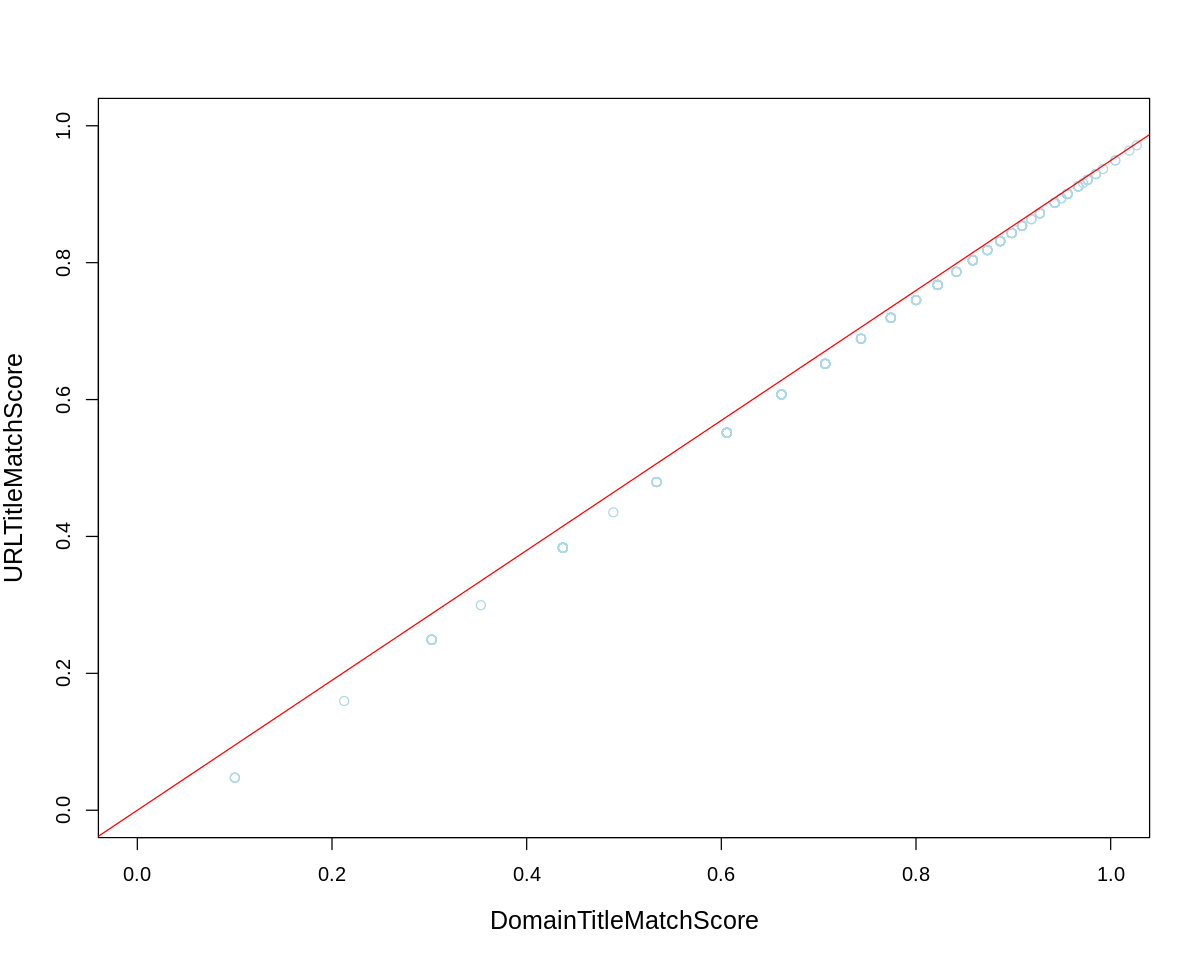

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$DomainTitleMatchScore, df_normalized$URLTitleMatchScore,
     xlab = "DomainTitleMatchScore", ylab = "URLTitleMatchScore",
     col = 'lightblue',
     xlim = c(0, 1), ylim = c(0, 1),
     cex.lab = 1.25)
abline(lm(df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore), col = "red")

### LineOfCode ~ NoOfExternalFiles

In [ ]:
model <- lm(df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles)

# r.square
summary(model)


Call:
lm(formula = df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.155  -0.206  -0.165  -0.005 104.559 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.749e-17  6.503e-03    0.00        1    
df_normalized$NoOfExternalFiles 3.845e-01  6.503e-03   59.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9231 on 20151 degrees of freedom
Multiple R-squared:  0.1478,	Adjusted R-squared:  0.1478 
F-statistic:  3496 on 1 and 20151 DF,  p-value: < 2.2e-16


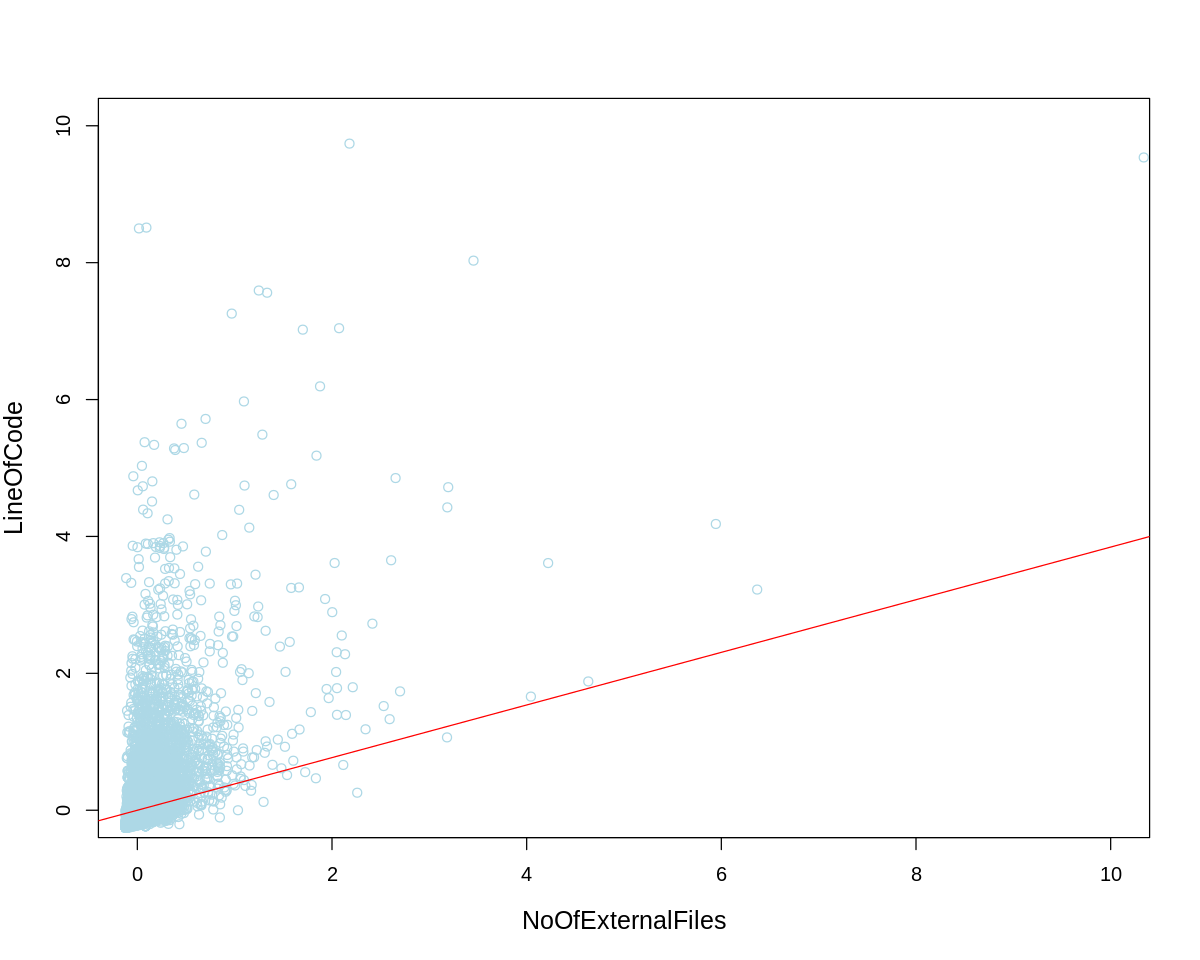

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$NoOfExternalFiles, df_normalized$LineOfCode,
     xlab = "NoOfExternalFiles", ylab = "LineOfCode",
     col = 'lightblue',
     xlim = c(0, 10), ylim = c(0, 10),
     cex.lab = 1.25)
abline(lm(df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles), col = "red")

## **Multiple Linear Regression**

### URLLength ~ [all features - label]

In [6]:
model <- lm(URLLength ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = URLLength ~ . - label, data = df_normalized)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2630 -0.0184 -0.0007  0.0241  3.3991 

Coefficients:
                        Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           -3.485e-03  9.685e-04   -3.598 0.000321 ***
DomainLength          -6.865e-03  3.707e-04  -18.518  < 2e-16 ***
TLDEncoding            9.317e-03  3.834e-04   24.302  < 2e-16 ***
NoOfLettersInURL       7.228e-01  6.443e-04 1121.943  < 2e-16 ***
NoOfDegitsInURL        2.338e-01  4.866e-04  480.404  < 2e-16 ***
NoOfSpecialCharsInURL  1.301e-01  6.314e-04  206.058  < 2e-16 ***
LineOfCode             1.063e-03  3.753e-04    2.833 0.004610 ** 
LargestLineLength     -4.611e-03  3.391e-04  -13.595  < 2e-16 ***
NoOfReference          1.436e-03  3.537e-04    4.059 4.94e-05 ***
DomainTitleMatchScore  3.141e-02  1.102e-03   28.488  < 2e-16 ***
URLTitleMatchScore    -1.498e-02  1.095e-03  -13.684  < 2e-16 ***
NoOfExternalFiles     -8.957e-05  

#### Standard residuals compared to estimated values

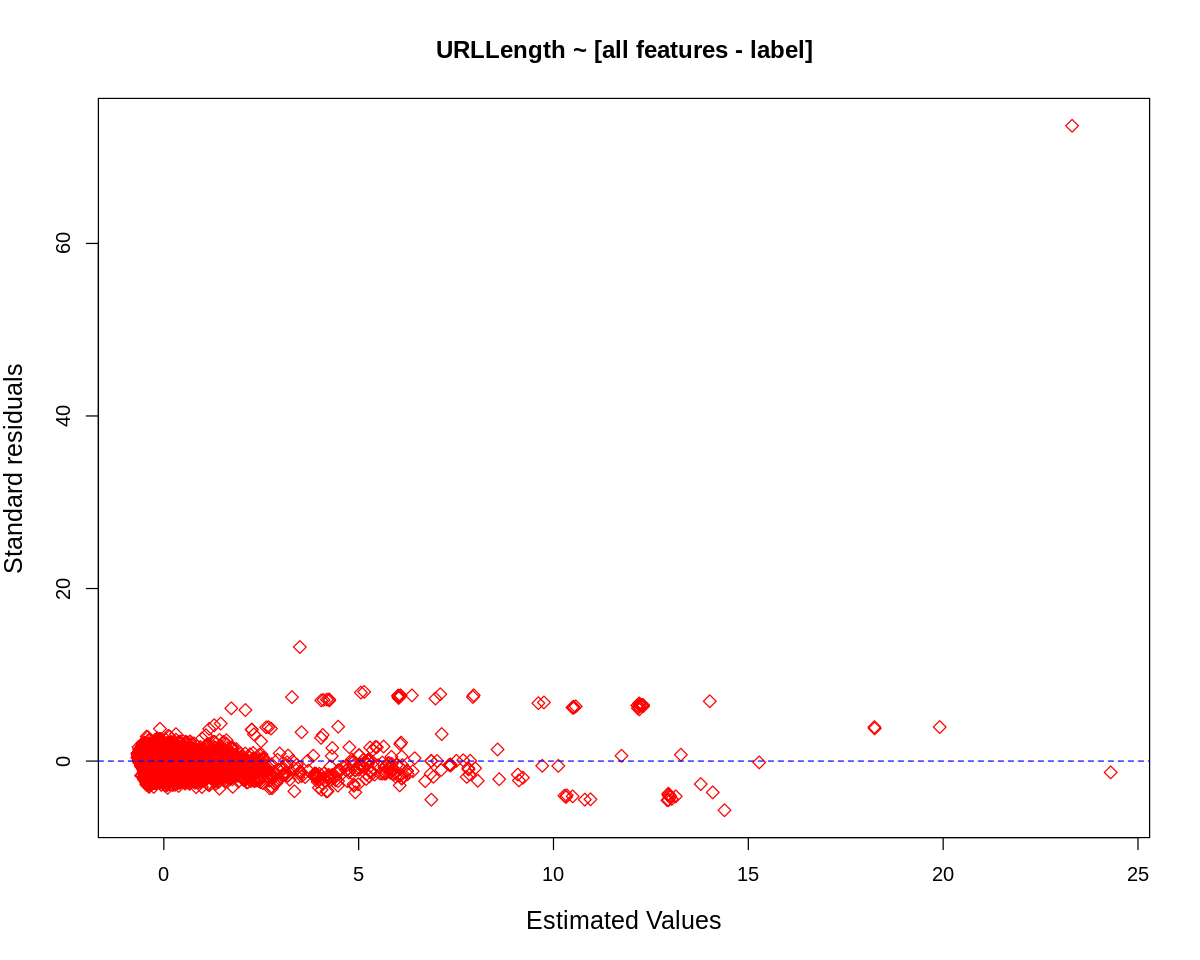

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="URLLength ~ [all features - label]",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

### URLTitleMatchScore ~ [all features - label]

In [21]:
model <- lm(URLTitleMatchScore ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = URLTitleMatchScore ~ . - label, data = df_normalized)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77382 -0.09518 -0.02227  0.02115  2.12254 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.1202449  0.0061495 -19.554  < 2e-16 ***
URLLength             -0.6150648  0.0449465 -13.684  < 2e-16 ***
DomainLength          -0.0876021  0.0023146 -37.848  < 2e-16 ***
TLDEncoding           -0.0159427  0.0024894  -6.404 1.55e-10 ***
NoOfLettersInURL       0.5390366  0.0326795  16.495  < 2e-16 ***
NoOfDegitsInURL        0.1309552  0.0109684  11.939  < 2e-16 ***
NoOfSpecialCharsInURL  0.0110603  0.0071325   1.551   0.1210    
LineOfCode            -0.0006180  0.0024051  -0.257   0.7972    
LargestLineLength     -0.0009879  0.0021829  -0.453   0.6509    
NoOfReference         -0.0022936  0.0022671  -1.012   0.3117    
DomainTitleMatchScore  0.9411599  0.0028118 334.720  < 2e-16 ***
NoOfExternalFiles      0.00

#### Standard residuals compared to estimated values

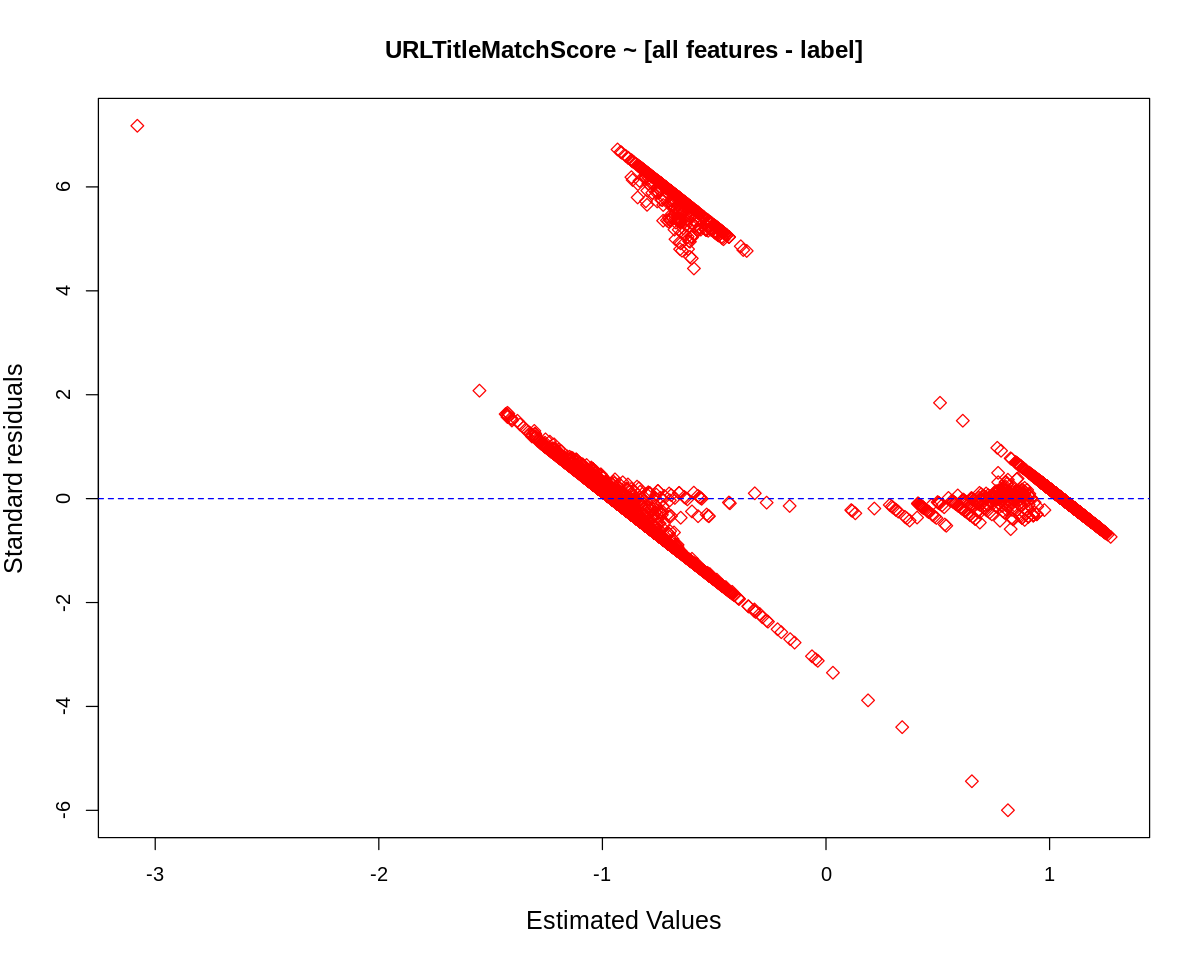

In [22]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="URLTitleMatchScore ~ [all features - label]",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

### LineOfCode ~ [all features - label]

In [19]:
model <- lm(LineOfCode ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = LineOfCode ~ . - label, data = df_normalized)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.899  -0.157  -0.020   0.035 104.228 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.129144   0.018167  -7.109 1.21e-12 ***
URLLength              0.374836   0.132292   2.833  0.00461 ** 
DomainLength          -0.002809   0.007020  -0.400  0.68900    
TLDEncoding            0.009355   0.007302   1.281  0.20016    
NoOfLettersInURL      -0.283419   0.096385  -2.940  0.00328 ** 
NoOfDegitsInURL       -0.088797   0.032248  -2.754  0.00590 ** 
NoOfSpecialCharsInURL -0.051091   0.020899  -2.445  0.01451 *  
LargestLineLength      0.078786   0.006373  12.363  < 2e-16 ***
NoOfReference          0.238759   0.006427  37.150  < 2e-16 ***
DomainTitleMatchScore  0.003823   0.021111   0.181  0.85631    
URLTitleMatchScore    -0.005307   0.020652  -0.257  0.79721    
NoOfExternalFiles      0.346965   0.006162  56.310  < 2e-

#### Standard residuals compared to estimated values

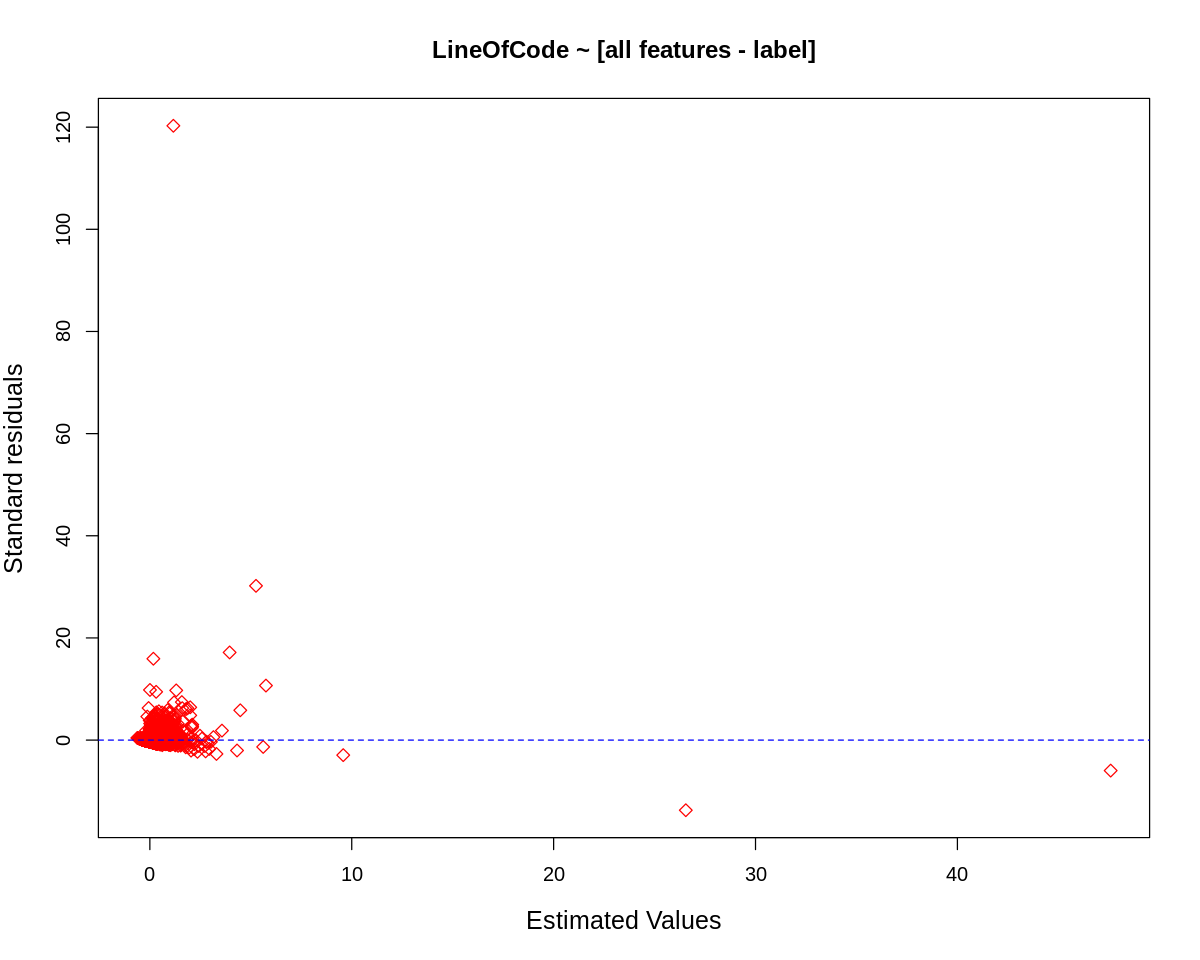

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="LineOfCode ~ [all features - label]",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

## **Log transforming**

The logarithmic transformation helps reduce the influence of outliers in the data. By applying the logarithm, larger values are "compressed" or scaled down, while smaller values remain relatively unchanged. This mitigates the effect of outliers, making the regression model more stable and less sensitive to extreme data points.

$$
 x' = \log(x)
$$

In [23]:
# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20, 21)

df_log <- df[, -exclude_columns]

df_log[] <- lapply(df_log, function(x) {
   log(x + 0.001)
})

# Combined binary and continuous features
df_log <- cbind(df_log, df[, exclude_columns])

# Converting in data frame
df_log <- as.data.frame(df_log)

In [ ]:
str(df_log)

'data.frame':	20153 obs. of  21 variables:
 $ URLLength            : num  6.14 5.94 5.65 6.08 3.09 ...
 $ DomainLength         : num  2.64 2.64 2.64 2.64 2.64 ...
 $ TLDEncoding          : num  -6.91 -6.91 -6.91 -6.91 -6.91 ...
 $ NoOfLettersInURL     : num  5.7 5.42 5.14 5.02 -6.91 ...
 $ NoOfDegitsInURL      : num  4.47 4.39 3.99 5.58 2.4 ...
 $ NoOfSpecialCharsInURL: num  3.99 3.87 3.61 2.64 1.39 ...
 $ LineOfCode           : num  0.694 0.694 2.398 5.489 2.833 ...
 $ LargestLineLength    : num  7.4 7.4 6.34 6.1 5.46 ...
 $ NoOfReference        : num  -6.908 -6.908 0.001 0.001 0.694 ...
 $ DomainTitleMatchScore: num  -6.91 -6.91 -6.91 -6.91 -6.91 ...
 $ URLTitleMatchScore   : num  -6.91 -6.91 -6.91 -6.91 -6.91 ...
 $ NoOfExternalFiles    : num  0.001 0.001 -6.908 1.61 -6.908 ...
 $ IsHTTPS              : int  1 1 1 0 0 1 1 0 0 1 ...
 $ HasTitle             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 

## **Simple Linear Regression**

### LineOfCode ~ NoOfExternalFiles

In [24]:
model <- lm(df_log$LineOfCode ~ df_log$NoOfExternalFiles)

# r.square
summary(model)


Call:
lm(formula = df_log$LineOfCode ~ df_log$NoOfExternalFiles)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7933 -0.7705  0.1338  0.7100  5.1071 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.016926   0.009741   515.0   <2e-16 ***
df_log$NoOfExternalFiles 0.427668   0.001954   218.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.382 on 20151 degrees of freedom
Multiple R-squared:  0.7038,	Adjusted R-squared:  0.7038 
F-statistic: 4.789e+04 on 1 and 20151 DF,  p-value: < 2.2e-16


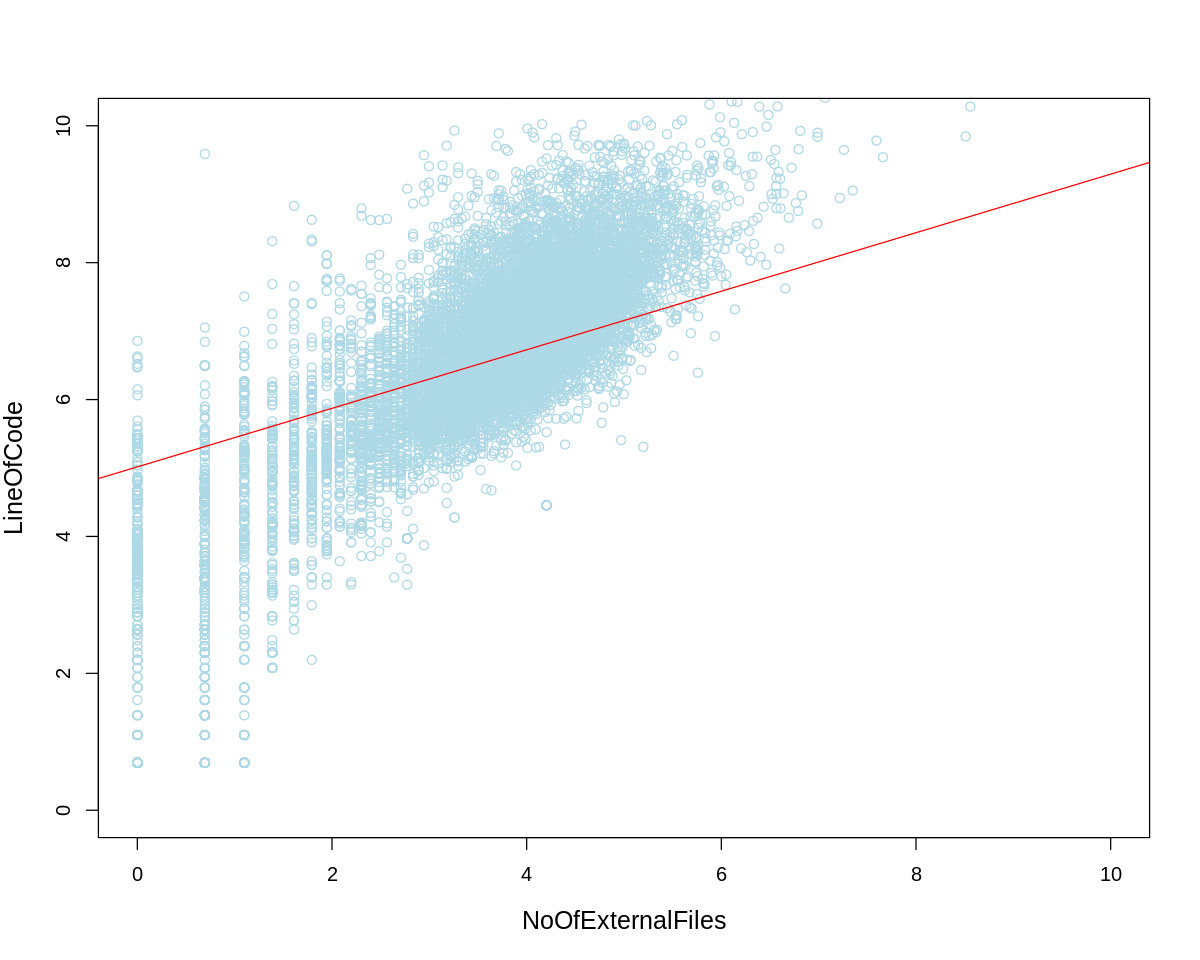

In [25]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_log$NoOfExternalFiles, df_log$LineOfCode,
     xlab = "NoOfExternalFiles", ylab = "LineOfCode",
     col = 'lightblue',
     xlim = c(0, 10), ylim = c(0, 10),
     cex.lab = 1.25)
abline(lm(df_log$LineOfCode ~ df_log$NoOfExternalFiles), col = "red")

## **Multiple Linear Regression**

### LineOfCode ~ [all features - label]

In [26]:
model <- lm(LineOfCode ~ . - label, data = df_log)

# r.square
summary(model)


Call:
lm(formula = LineOfCode ~ . - label, data = df_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9380 -0.4846  0.0309  0.4837  5.0005 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.4157093  0.1310021  10.807  < 2e-16 ***
URLLength             -0.0344019  0.0496960  -0.692 0.488790    
DomainLength           0.3374775  0.0227006  14.866  < 2e-16 ***
TLDEncoding           -0.0138173  0.0043847  -3.151 0.001628 ** 
NoOfLettersInURL      -0.2080019  0.0257287  -8.084 6.60e-16 ***
NoOfDegitsInURL       -0.0099357  0.0027723  -3.584 0.000339 ***
NoOfSpecialCharsInURL -0.0688489  0.0198480  -3.469 0.000524 ***
LargestLineLength      0.1250290  0.0047509  26.317  < 2e-16 ***
NoOfReference          0.1128723  0.0031452  35.888  < 2e-16 ***
DomainTitleMatchScore  0.0127297  0.0041187   3.091 0.001999 ** 
URLTitleMatchScore    -0.0151202  0.0039486  -3.829 0.000129 ***
NoOfExternalFiles      0.1229316  0.0029951  41.045 

#### Standard residuals compared to estimated values

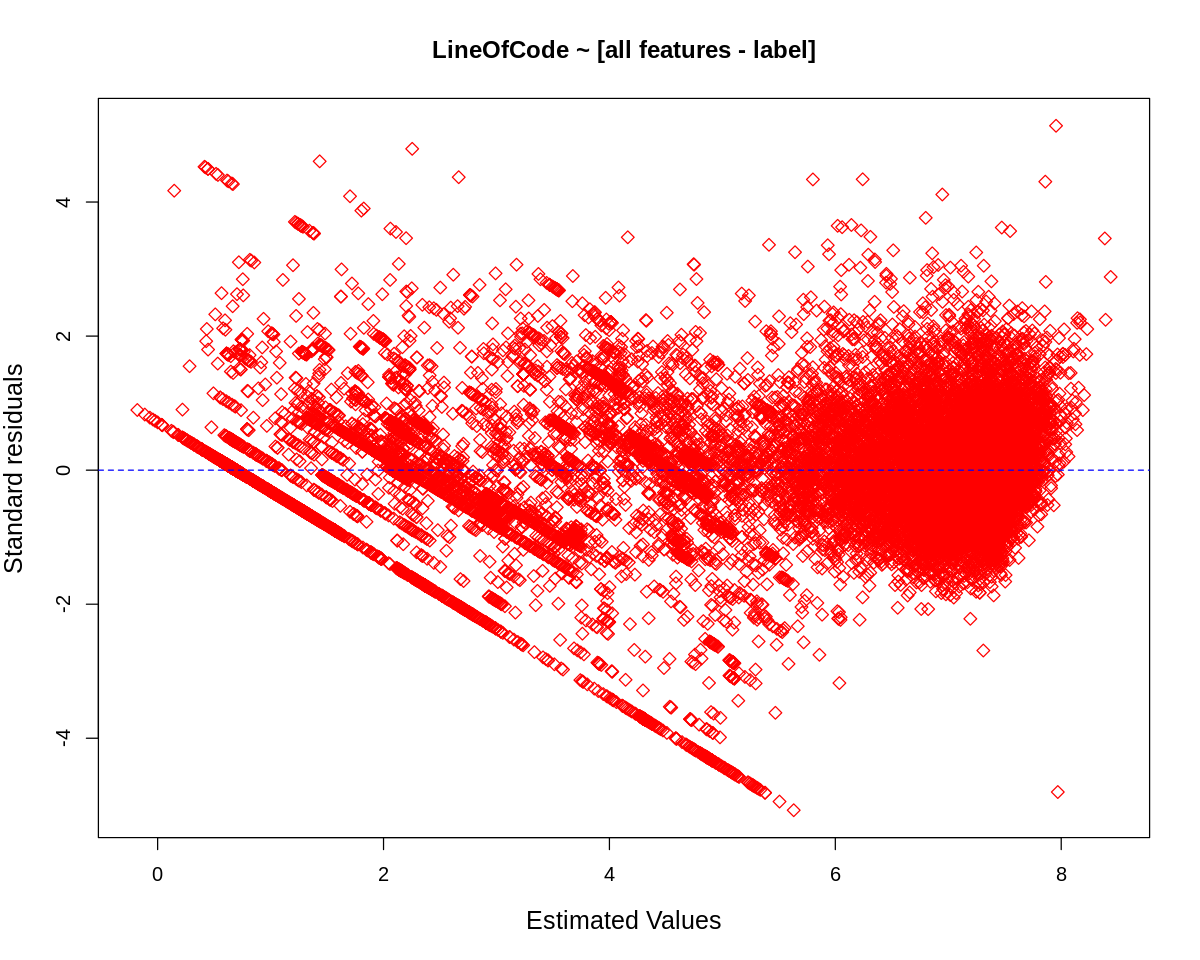

In [27]:
# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="LineOfCode ~ [all features - label]",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)